# Create Eastern boundary condition for Pb

In [1]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np

from salishsea_tools import (
    nc_tools,
    viz_tools,
)
import datetime
import matplotlib
from mpl_toolkits.basemap import Basemap, cm
import cmocean
import datetime
# import seaborn as sns
import csv
import matplotlib.image as mpimg

%matplotlib inline

/ocean/brogalla/GEOTRACES/analysis-birgit/cmocean-master/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


In [62]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

#### Extended domain:

In [2]:
mesh = nc.Dataset('/ocean/brogalla/GEOTRACES/analysis-birgit/notebooks/ANHA12/ANHA12_mesh1.nc')
mesh_lon = mesh.variables['nav_lon']
mesh_lat = mesh.variables['nav_lat']
mesh_bathy = mesh.variables['hdept'][0]

In [3]:
mesh_lon = np.array(mesh_lon)
mesh_lat = np.array(mesh_lat)
mesh_bathy = np.array(mesh_bathy)

In [4]:
cond2 = (mesh_bathy > 0.1)
bathy_masked = np.ma.masked_where(cond2, mesh_bathy)

In [5]:
mask = nc.Dataset('/ocean/brogalla/GEOTRACES/data/ANHA12_mask.nc')
tmask = mask.variables['tmask']
tmask = np.array(tmask[0,:,:,:])
mlons = mask.variables['nav_lon']
mlats = mask.variables['nav_lat']
mlons = np.array(mlons)
mlats = np.array(mlats)
cond = (tmask > 0.1) 
Z_masked = np.ma.masked_where(cond, tmask) 

### Read GEOTRACES extracted data:

In [6]:
file1 = 'GEOTRACES_IDP2017_v2_Discrete_Sample_Data_5024209a_1.nc'
folder= '/ocean/brogalla/GEOTRACES/data/'
data = nc.Dataset(folder+file1)

In [7]:
lats_data = data.variables['latitude']
lons_data = data.variables['longitude']
depths_data = data.variables['var2']
time_data = data.variables['date_time']
Pb_diss = data.variables['var5'] # in pmol/kg
# Empty:
# Pb_tdiss = data.variables['var7'] # total dissolvable Pb (dissolved plus reactive particulate phase that dissolves while stored acidified)
# Pb_part = data.variables['var9'] # pmol/kg Concentration of total particulate lead determined by filtration from a water sampling bottle
# Pb_lpart = data.variables['var12'] # pmol/k Concentration of labile particulate lead determined by filtration from a water sampling bottle

In [8]:
time_data

<class 'netCDF4._netCDF4.Variable'>
float64 date_time(N_STATIONS)
    long_name: Decimal Gregorian Days of the station
    standard_name: time
    units: days since 2010-01-01 00:00:00 UTC
    comment: Relative Gregorian Days with decimal part
    C_format: %.5f
    FORTRAN_format: F12.5
    _FillValue: -10000000000.0
unlimited dimensions: 
current shape = (60,)
filling on

Time ranges from roughly mid 2010 to 2014

In [9]:
lats_data = np.array(lats_data)
lons_data = np.array(lons_data)
depths_data = np.array(depths_data)
time_data = np.array(time_data)
Pb_diss   = np.array(Pb_diss)

In [10]:
print(lons_data.shape)
print(lats_data.shape)
print(depths_data.shape)
print(time_data.shape)
print(Pb_diss.shape)

(60,)
(60,)
(60, 288)
(60,)
(60, 288)


#### Cruise stations:

/home/brogalla/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4979: MatplotlibDeprecationWarning: The is_scalar function was deprecated in version 2.1.
  elif masked and is_scalar(masked):
/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: Matplo

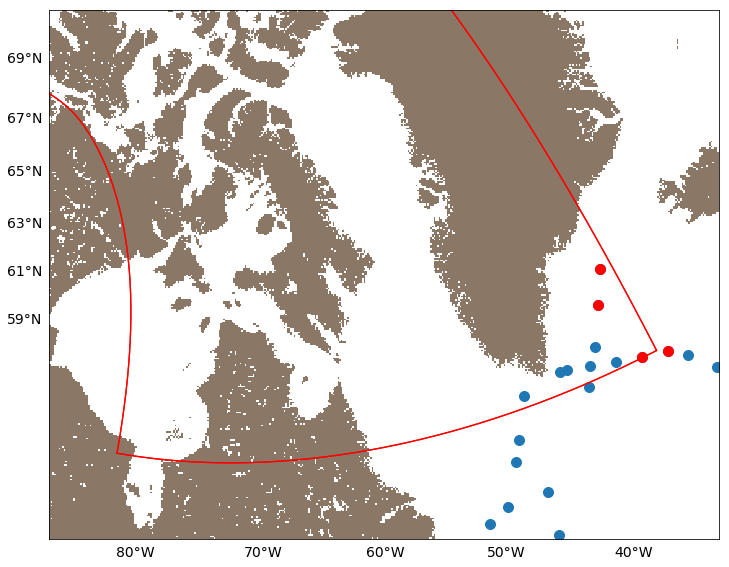

In [11]:
fig, ax1 = plt.subplots(figsize=(12,10))

proj2 = Basemap(projection='stere',lat_0 = 66, lon_0 = -60, resolution='i', width=3.8e6, height=3e6, ax=ax1)
proj2.drawparallels(np.arange(int(59),int(90),2),labels=[1,0,0,0], linewidth=0.0, fontsize=14)
proj2.drawmeridians(np.arange(int(-140),int(-30),10),labels=[0,0,0,1], linewidth=0.0, fontsize=14)
proj2.drawlsmask(land_color = "#8b7765", ocean_color="#ffffff", resolution = 'h')

x_mesh, y_mesh = proj2(mesh_lon, mesh_lat)

x=x_mesh
y=y_mesh
res=10

# plot station locations:
x_data, y_data = proj2(lons_data-360, lats_data)
proj2.plot(x_data, y_data, '.', markersize=20)
proj2.plot(x_data[9:11], y_data[9:11], '.r', markersize=20)
proj2.plot(x_data[20:22], y_data[20:22], '.r', markersize=20)

# sub-domain:
l1=1100
proj2.plot(x[l1:2050,799]   , y[l1:2050,799]   , 'r-', lw=1.3)
proj2.plot(x[l1:2050,799].T , y[l1:2050,799].T , 'r-', lw=1.3)
proj2.plot(x[l1:2050,200]   , y[l1:2050,200]   , 'r-', lw=1.3)
proj2.plot(x[l1:2050,200].T , y[l1:2050,200].T , 'r-', lw=1.3)
proj2.plot(x[l1,200:799]    , y[l1,200:799]    , 'r-', lw=1.3)
proj2.plot(x[l1,200:799].T  , y[l1,200:799].T  , 'r-', lw=1.3)
proj2.plot(x[2050,200:799]    , y[2050,200:799]    , 'r-', lw=1.3)
proj2.plot(x[2050,200:799].T  , y[2050,200:799].T  , 'r-', lw=1.3)

Plot profiles of Pb measurements at the stations. First need to mask the fill values:

In [12]:
cond3 = ( Pb_diss > 1e5)
m1Pb_diss = np.ma.masked_where(cond3, Pb_diss)
cond4 = ( Pb_diss < -1e5 )
mPb_diss = np.ma.masked_where(cond4, m1Pb_diss)

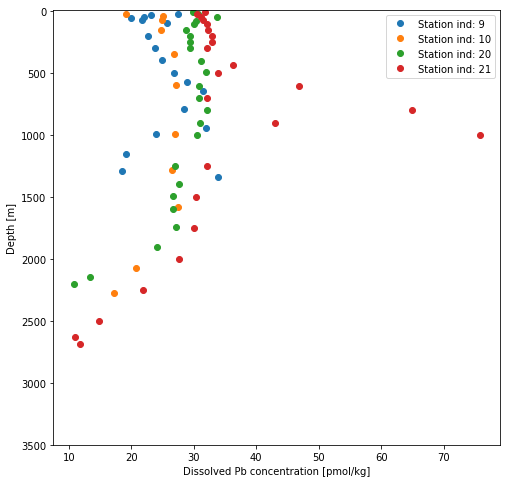

In [13]:
fig, ax1 = plt.subplots(figsize=(8,8))
stations = [9, 10, 20, 21]
for i in stations:
    plt.plot(mPb_diss[i,:], depths_data[i,:], '.', markersize=12, label='Station ind: '+str(i))
plt.xlabel('Dissolved Pb concentration [pmol/kg]')
plt.ylabel('Depth [m]')
plt.gca().invert_yaxis()
plt.ylim([3500, -10])
plt.legend()

Now, need to interpolate these onto the model boundary:

/home/brogalla/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4979: MatplotlibDeprecationWarning: The is_scalar function was deprecated in version 2.1.
  elif masked and is_scalar(masked):
/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: Matplo

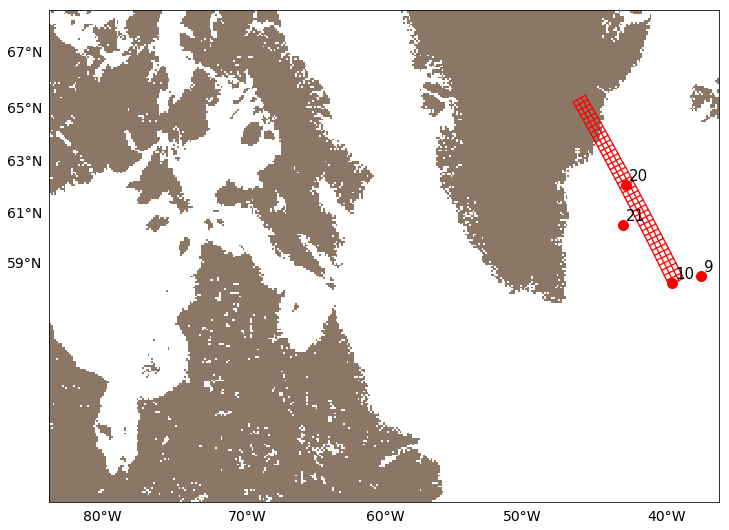

In [14]:
fig, ax1 = plt.subplots(figsize=(12,10))

proj2 = Basemap(projection='stere',lat_0 = 63, lon_0 = -60, resolution='i', width=3.4e6, height=2.5e6, ax=ax1)
proj2.drawparallels(np.arange(int(59),int(90),2),labels=[1,0,0,0], linewidth=0.0, fontsize=14)
proj2.drawmeridians(np.arange(int(-140),int(-30),10),labels=[0,0,0,1], linewidth=0.0, fontsize=14)
proj2.drawlsmask(land_color = "#8b7765", ocean_color="#ffffff", resolution = 'h')

x_mesh, y_mesh = proj2(mesh_lon, mesh_lat)

# plot station locations:
x_data, y_data = proj2(lons_data-360, lats_data)
x = [x_data[9], x_data[10], x_data[20], x_data[21]]
y = [y_data[9], y_data[10], y_data[20], y_data[21]]
proj2.plot(x,y,'.r',markersize=20)
station=[9, 10, 20, 21]
for i, (X, Y) in enumerate(zip(x, y), start=1):
    ax1.annotate(str(station[i-1]), (X,Y), xytext=(3,5), textcoords='offset points', fontsize=15)

# sub-domain:
l1=1100
proj2.plot(x_mesh[l1:1300:5,779:799:5]   , y_mesh[l1:1300:5,779:799:5]   , 'r-', lw=1.3);
proj2.plot(x_mesh[l1:1300:5,779:799:5].T , y_mesh[l1:1300:5,779:799:5].T , 'r-', lw=1.3);

Boundary thickness is 20

In [15]:
boundary_lats = mesh_lat[1100:1300,779:799]
boundary_lons = mesh_lon[1100:1300,779:799]
print(boundary_lats.shape)
print(boundary_lons.shape)

(200, 20)
(200, 20)


Plot profiles along the boundary (from South to North):

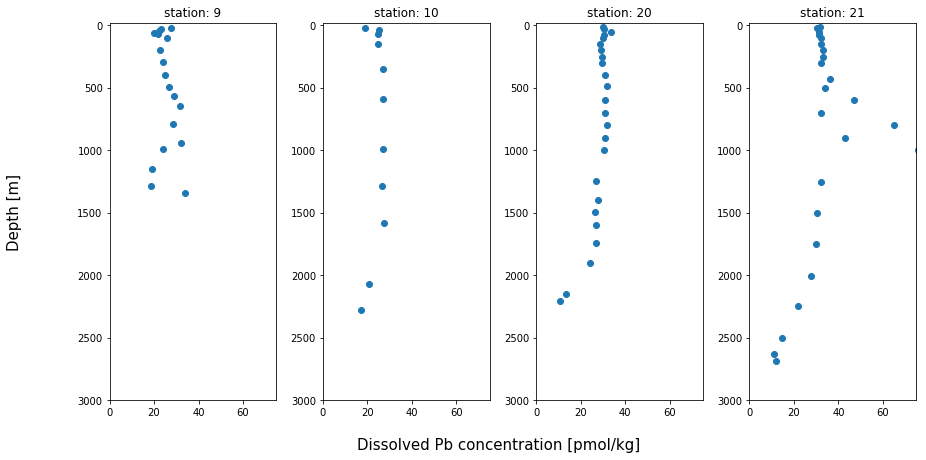

In [16]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(12, 6))

stations=[9, 10, 20, 21]
i = 0
for ax in axs.flat:
    ax.plot(mPb_diss[stations[i],:], depths_data[stations[i],:], '.', markersize=12)
    ax.set_title('station: '+str(stations[i]))
    ax.invert_yaxis()
    ax.set_ylim(3000,-20)
    ax.set_xlim(0, 75)
    i += 1
    
fig.text(0.5, -0.04, 'Dissolved Pb concentration [pmol/kg]', ha='center', va='center',fontsize=15)
fig.text(-0.06, 0.5, 'Depth [m]', ha='center', va='center', rotation='vertical', fontsize=15)

plt.tight_layout()

#### Create one vertical profile of dissolved Pb for the eastern boundary condition:

Interpolate the Pb data at the boundary. First interpolate the profiles.

In [17]:
def smooth(x,window_len=11,window='hanning'):
    """smooth the data using a window with requested size.
    
    This method is based on the convolution of a scaled window with the signal.
    The signal is prepared by introducing reflected copies of the signal 
    (with the window size) in both ends so that transient parts are minimized
    in the begining and end part of the output signal.
    
    input:
        x: the input signal 
        window_len: the dimension of the smoothing window; should be an odd integer
        window: the type of window from 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'
            flat window will produce a moving average smoothing.

    output:
        the smoothed signal
        
    """

    if x.ndim != 1:
        raise ValueError#, "smooth only accepts 1 dimension arrays."

    if x.size < window_len:
        raise ValueError#, "Input vector needs to be bigger than window size."


    if window_len<3:
        return x


    if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
        raise ValueError#, "Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'"

    s=np.r_[x[window_len-1:0:-1],x,x[-2:-window_len-1:-1]]
    if window == 'flat': #moving average
        w=np.ones(window_len,'d')
    else:
        w=eval('numpy.'+window+'(window_len)')

    y=np.convolve(w/w.sum(),s,mode='valid')
    return y

In [18]:
# create one array of depths and Pb concentrations for stations at southern boundary:
stations = [9,10,20,21]
Pb_dtotal = np.array([])
depth_total = np.array([])
for i in stations:
    depth_total = np.append(depths_data[i,:], depth_total)
    Pb_dtotal   = np.append(mPb_diss[i,:], Pb_dtotal)

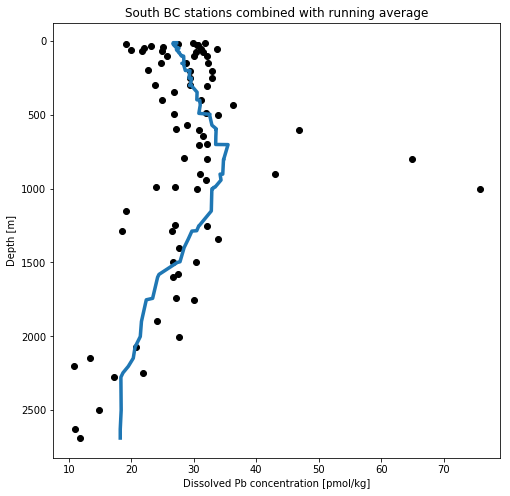

In [19]:
fig, ax1 = plt.subplots(figsize=(8,8))

# remove masked components:
masked_array1 = np.ma.masked_where((Pb_dtotal > 1e5), Pb_dtotal)
masked_array = np.ma.masked_where((Pb_dtotal < -1e5), masked_array1)
x = Pb_dtotal[~masked_array.mask]
y = depth_total[~masked_array.mask]
b = sorted((i,j) for i,j in zip(y,x))
y1, x1 = zip(*b)
plt.plot(x1, y1, '.k', markersize=12)

# moving average:
x1 = np.array(x1)
y1 = np.array(y1)
x1_ave = smooth(x1, window_len=20, window='flat')
x1_smoothed = x1_ave[10:-9]
plt.plot(x1_smoothed, y1, linewidth=3.5)

plt.title('South BC stations combined with running average')
plt.xlabel('Dissolved Pb concentration [pmol/kg]')
plt.ylabel('Depth [m]')
plt.gca().invert_yaxis()

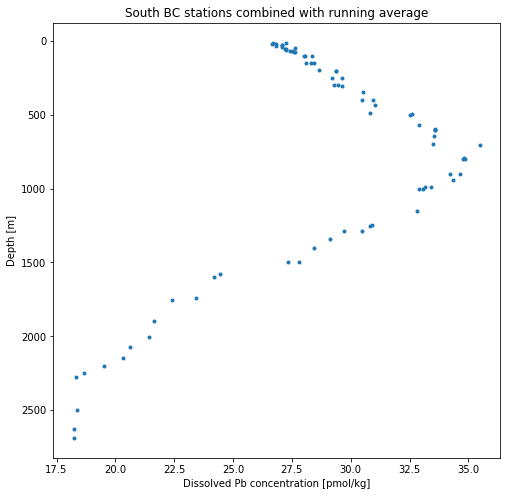

In [20]:
fig, ax1 = plt.subplots(figsize=(8,8))
plt.plot(x1_smoothed, y1, '.') #linewidth=3.5)

plt.title('South BC stations combined with running average')
plt.xlabel('Dissolved Pb concentration [pmol/kg]')
plt.ylabel('Depth [m]')
plt.gca().invert_yaxis()

Now interpolate to the model grid depths:

In [21]:
mesh = '/ocean/brogalla/GEOTRACES/data/ANHA12/ANHA12/ANHA12-EXH006_5d_gridT_y2002m01d05.nc'
m = nc.Dataset(mesh)
mdepth = m.variables['deptht']
mlons = m.variables['nav_lon']
mlats = m.variables['nav_lat']
mdepth = np.array(mdepth)
mlons = np.array(mlons)
mlats = np.array(mlats)

In [22]:
def interp_depths(var, mdepth, fill):
    # constant extrapolation for values outside of the range
    from scipy import interpolate
    
    interp_var = np.empty(mdepth.shape)
    x = y1

    y = var[:]
    f = interpolate.interp1d(x, y, fill_value = fill)
    interp_var[:] = f(mdepth)
    return interp_var

In [23]:
Pb_diss_int = interp_depths(x1_smoothed, mdepth, fill='extrapolate')
Pb_diss_int = np.array(Pb_diss_int)

/home/brogalla/anaconda3/lib/python3.6/site-packages/scipy/interpolate/interpolate.py:554: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


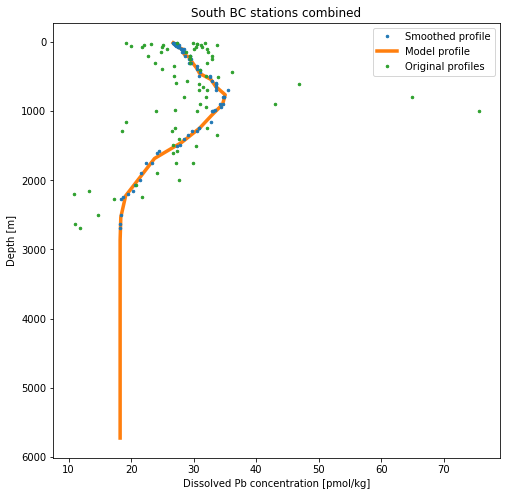

In [56]:
fig, ax1 = plt.subplots(figsize=(8,8))
plt.plot(x1_smoothed, y1, '.', markersize=5, zorder=2, label = 'Smoothed profile')
plt.plot(Pb_diss_int, mdepth, '-', linewidth=3.5, zorder=1, label = 'Model profile')
plt.plot(x1, y1, '.', markersize=5, label = 'Original profiles')

plt.title('South BC stations combined')
plt.xlabel('Dissolved Pb concentration [pmol/kg]')
plt.ylabel('Depth [m]')
plt.gca().invert_yaxis()
plt.legend()

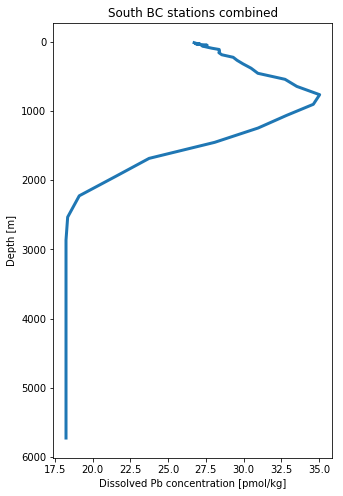

In [24]:
fig, ax1 = plt.subplots(figsize=(5,8))
plt.plot(Pb_diss_int, mdepth, '-', linewidth=3, zorder=1)
plt.title('South BC stations combined')
plt.xlabel('Dissolved Pb concentration [pmol/kg]')
plt.ylabel('Depth [m]')
plt.gca().invert_yaxis()

Now I need to add this profile for every gridpoint on the boundary.

### Boundary condition:

In [26]:
print('Boundary latitudes shape: ', boundary_lats.shape)
print('Boundary longitudes shape: ',boundary_lons.shape)

Boundary latitudes shape:  (200, 20)
Boundary longitudes shape:  (200, 20)


In [27]:
print('final dimension should be 1D of length:', len(boundary_lats[0,:])*len(boundary_lats[:,0]))

final dimension should be 1D of length: 4000


In [25]:
Pb_diss_int

array([         inf,          inf,          inf,          inf,
                inf,          inf,          inf,          inf,
        26.72270534,  26.7530947 ,  26.78762215,  26.82719773,
        26.8256127 ,  27.08456877,  26.8417384 ,  27.00509087,
        27.25271281,  27.58449943,  27.22933957,  27.37819775,
        27.61918569,  27.92508991,  28.38335295,  28.4057851 ,
        28.36267302,  28.56035372,  29.31103888,  29.56811878,
        29.96502972,  30.49663427,  30.94718338,  32.74830284,
        33.52746481,  35.04156736,  34.6231778 ,  32.85270193,
        30.96171407,  28.08462221,  23.73865755,  21.54669539,
        19.11213703,  18.3417772 ,  18.23200006,  18.23200006,
        18.23200006,  18.23200006,  18.23200006,  18.23200006,
        18.23200006,  18.23200006])

Based on one layer:

In [28]:
Pb_diss_int[0:8] = 26.7

In [29]:
Pb_diss_int

array([ 26.7       ,  26.7       ,  26.7       ,  26.7       ,
        26.7       ,  26.7       ,  26.7       ,  26.7       ,
        26.72270534,  26.7530947 ,  26.78762215,  26.82719773,
        26.8256127 ,  27.08456877,  26.8417384 ,  27.00509087,
        27.25271281,  27.58449943,  27.22933957,  27.37819775,
        27.61918569,  27.92508991,  28.38335295,  28.4057851 ,
        28.36267302,  28.56035372,  29.31103888,  29.56811878,
        29.96502972,  30.49663427,  30.94718338,  32.74830284,
        33.52746481,  35.04156736,  34.6231778 ,  32.85270193,
        30.96171407,  28.08462221,  23.73865755,  21.54669539,
        19.11213703,  18.3417772 ,  18.23200006,  18.23200006,
        18.23200006,  18.23200006,  18.23200006,  18.23200006,
        18.23200006,  18.23200006])

In [30]:
dPb_BC = np.zeros((50,4000))
for i in range(0,4000):
    dPb_BC[:,i] = Pb_diss_int

In [31]:
dPb_BC.shape

(50, 4000)

In [32]:
dPb_EBC = np.reshape(dPb_BC, (1,50,1,4000))

## Create BC NetCDF file:

In [33]:
# Load structure from sample dataset:
BZ = mask.dimensions['z']

In [34]:
# Setup the new NetCDF file:
ncd = nc.Dataset('Pb_East_OBC_20181213.nc', 'w', zlib=True)
nc_tools.init_dataset_attrs(
    ncd,
    title='Pb Eastern OBC',
    notebook_name='create_OBC',
    nc_filepath='./create_OBC.nc',
    comment='Eastern boundary')

ncd.createDimension('x', len(boundary_lats[0,:])*len(boundary_lats[:,0]))
ncd.createDimension('y',1)
ncd.createDimension('z',len(BZ))
ncd.createDimension('t',None)

file format: NETCDF4
Conventions: CF-1.6
title: Pb Eastern OBC
institution: Dept of Earth, Ocean & Atmospheric Sciences, University of British Columbia
source: https://bitbucket.org/ccar-modeling/analysis-birgit/src/tip/notebooks/ANHA12/BC/create_OBC.ipynb
references: REQUIRED
history: [2018-12-18 11:04:45] Created netCDF4 zlib=True dataset.
comment: Eastern boundary


<class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 't', size = 0

In [35]:
dPb = ncd.createVariable('dPb', 'float64', ('t','z','y','x'))
dPb.units = 'dissolv. Pb'
dPb.long_name = 'dPb'
dPb[:] = dPb_EBC

In [36]:
nc_tools.check_dataset_attrs(ncd)
ncd.close()

Missing value for dataset attribute: references
